In [97]:
library(tidyverse)
library(broom)

In [98]:
load(file = "../data/roaches.rda")

In [99]:
head(roaches)

,y,roach1,treatment,senior,exposure2
,<int>,<dbl>,<int>,<int>,<dbl>
1,153,308.00,1,0,0.800000
2,127,331.25,1,0,0.600000
3,7,1.67,1,0,1.000000
4,7,3.00,1,0,1.000000
5,0,2.00,1,0,1.142857
6,0,0.00,1,0,1.000000


### Poisson Regression

In [100]:
poiss = glm(y ~ roach1 + treatment + senior, family='poisson', offset = log(exposure2), data = roaches )

In [101]:
grid <- expand.grid(
  roach1 = median(roaches$roach1),  # hold constant
  treatment = c(0, 1),
  senior = c(0, 1),
  exposure2 = 1  # to normalize offset
)

aug <- augment(poiss, newdata = grid, type.predict = "response")

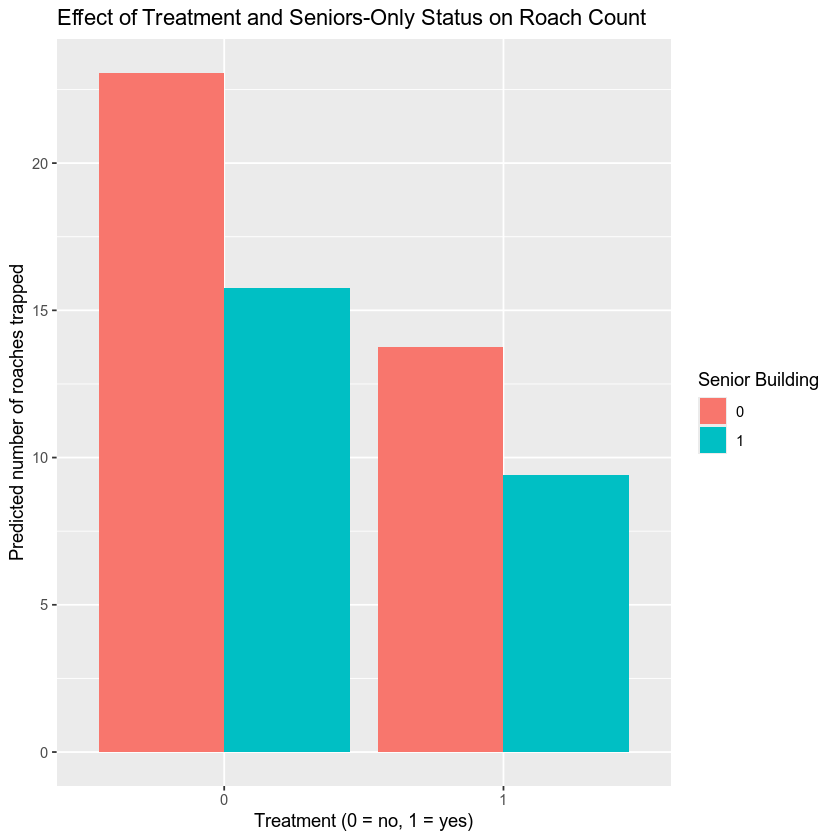

In [102]:
ggplot(aug, aes(x = factor(treatment), y = .fitted, fill = factor(senior))) +
  geom_col(position = "dodge") +
  labs(x = "Treatment (0 = no, 1 = yes)",
       y = "Predicted number of roaches trapped",
       fill = "Senior Building",
       title = "Effect of Treatment and Seniors-Only Status on Roach Count")

In [103]:
roaches_aug <- augment(poiss, type.predict='response')

`geom_smooth()` using formula = 'y ~ x'


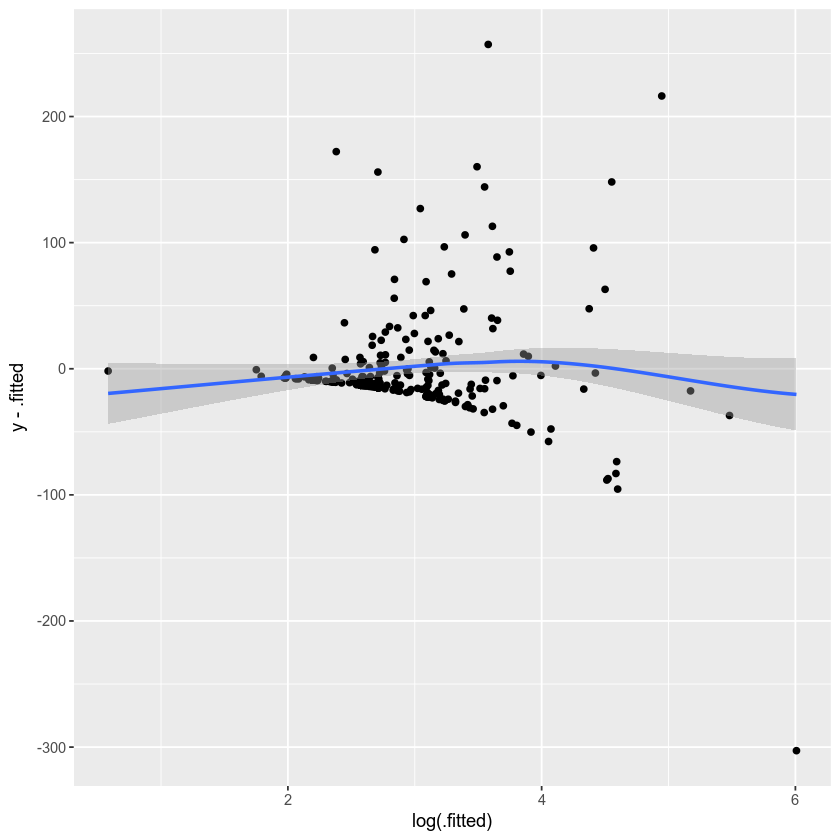

In [104]:
ggplot(roaches_aug, aes(x = log(.fitted), y= y-.fitted)) +
    geom_point() +
    geom_smooth(method = "loess", span = 1, method.args = list(degree = 1))

In [105]:
roaches_aug <- augment(poiss, type.predict='response', type.residuals = 'pearson')

In [106]:
head(roaches_aug)

y,roach1,treatment,senior,(offset),.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
153,308.00,1,0,-0.2231436,90.02678,6.636973,0.056932104,6.657531,0.704938784,6.834371
127,331.25,1,0,-0.5108256,79.42215,5.338681,0.055800539,6.661338,0.445983525,5.494170
7,1.67,1,0,0.0000000,13.25244,-1.717519,0.006662171,6.667732,0.004979261,-1.723269
7,3.00,1,0,0.0000000,13.37609,-1.743371,0.006689130,6.667698,0.005151326,-1.749232
0,2.00,1,0,0.1335314,15.18059,-3.896227,0.007621522,6.659849,0.029370787,-3.911160
0,0.00,1,0,0.0000000,13.09879,-3.619226,0.006628733,6.661082,0.021997770,-3.631281


`geom_smooth()` using formula = 'y ~ x'


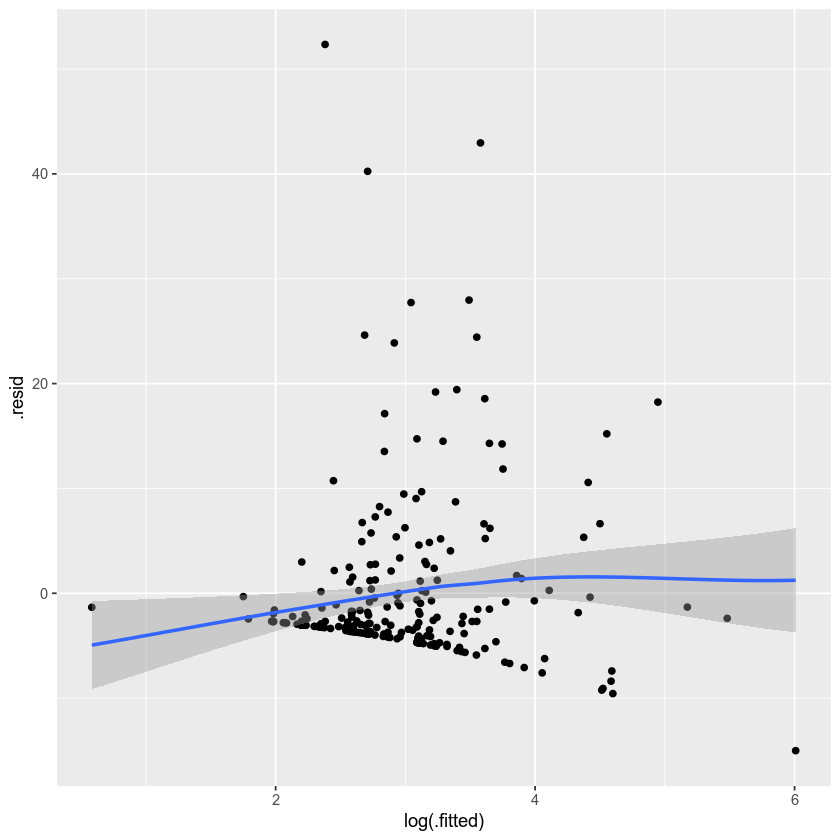

In [111]:
ggplot(roaches_aug, aes(x = log(.fitted), y= .resid)) +
    geom_point() + 
    geom_smooth(method = "loess", span = 1, method.args = list(degree = 1))